In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("Dataset",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 2557 images belonging to 7 classes.


In [ ]:
train_data.class_indices

{'cardboard': 0,
 'e-waste': 1,
 'glass': 2,
 'metal': 3,
 'organic': 4,
 'paper': 5,
 'plastic': 6}

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

In [ ]:
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [ ]:
prediction = layers.Dense(units = 7, activation="softmax")(x)

In [ ]:
model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit(train_data, epochs = 10, steps_per_epoch=len(train_data))

model.save("wasteClassificationFinal-epoch10.h5")

Epoch 1/10
80/80 [==============================] - 805s 10s/step - loss: 1.5774 - accuracy: 0.4079
Epoch 2/10
80/80 [==============================] - 723s 9s/step - loss: 1.2466 - accuracy: 0.5413
Epoch 3/10
80/80 [==============================] - 846s 11s/step - loss: 1.1241 - accuracy: 0.5729
Epoch 4/10
80/80 [==============================] - 1105s 14s/step - loss: 1.0164 - accuracy: 0.6058
Epoch 5/10
80/80 [==============================] - 1101s 14s/step - loss: 0.9757 - accuracy: 0.6453
Epoch 6/10
80/80 [==============================] - 1102s 14s/step - loss: 0.9799 - accuracy: 0.6269
Epoch 7/10
80/80 [==============================] - 1105s 14s/step - loss: 0.8673 - accuracy: 0.6903
Epoch 8/10
80/80 [==============================] - 1102s 14s/step - loss: 0.8329 - accuracy: 0.6989
Epoch 9/10
80/80 [==============================] - 1102s 14s/step - loss: 0.8239 - accuracy: 0.6985
Epoch 10/10
80/80 [==============================] - 22171s 280s/step - loss: 0.7648 - accuracy

In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["cardboard", "e-waste", "glass", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

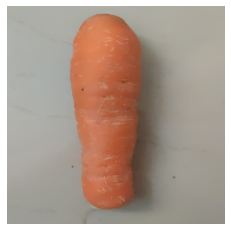

Your waste material is  organic  with  97.06  % accuracy


In [ ]:
waste_prediction("Test Data/IMG-20220519-WA0012.jpg")

In [ ]:
from keras.models import load_model

new_model = load_model('wasteClassificationFinal-epoch10.h5')
new_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

results = new_model.evaluate(train_data, steps=16)
print("loss n accuracy: ", results)

16/16 [==============================] - 148s 9s/step - loss: 0.7024 - accuracy: 0.7324
loss n accuracy:  [0.7024297118186951, 0.732421875]


In [ ]:
new_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = new_model.fit(train_data, epochs = 5, steps_per_epoch=len(train_data))

new_model.save("wasteClassificationFinal-epoch15.h5")

Epoch 1/5
80/80 [==============================] - 775s 10s/step - loss: 0.8675 - accuracy: 0.6711
Epoch 2/5
80/80 [==============================] - 722s 9s/step - loss: 0.7747 - accuracy: 0.7247
Epoch 3/5
80/80 [==============================] - 718s 9s/step - loss: 0.7515 - accuracy: 0.7204
Epoch 4/5
80/80 [==============================] - 720s 9s/step - loss: 0.7371 - accuracy: 0.7270
Epoch 5/5
80/80 [==============================] - 721s 9s/step - loss: 0.6932 - accuracy: 0.7474


In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["cardboard", "e-waste", "glass", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = new_model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

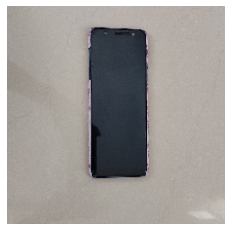

Your waste material is  e-waste  with  70.37  % accuracy


In [ ]:
waste_prediction("Test Data/IMG_20220528_134659__01.jpg")

In [ ]:
from keras.models import load_model

new_model2 = load_model('wasteClassificationFinal-epoch15.h5')
new_model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

results = new_model2.evaluate(train_data, steps=16)
print("loss n accuracy: ", results)

NameError: name 'train_data' is not defined

In [ ]:
new_model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = new_model2.fit(train_data, epochs = 5, steps_per_epoch=len(train_data))

new_model2.save("wasteClassificationFinal-epoch20.h5")

Epoch 1/5
80/80 [==============================] - 726s 9s/step - loss: 0.7525 - accuracy: 0.7360
Epoch 2/5
80/80 [==============================] - 724s 9s/step - loss: 0.6907 - accuracy: 0.7438
Epoch 3/5
80/80 [==============================] - 724s 9s/step - loss: 0.6792 - accuracy: 0.7567
Epoch 4/5
80/80 [==============================] - 724s 9s/step - loss: 0.6484 - accuracy: 0.7544
Epoch 5/5
80/80 [==============================] - 3143s 40s/step - loss: 0.6335 - accuracy: 0.7720


In [ ]:
from keras.models import load_model

new_model3 = load_model('wasteClassificationFinal-epoch20.h5')
new_model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

results = new_model3.evaluate(train_data, steps=16)
print("loss n accuracy: ", results)

16/16 [==============================] - 225s 14s/step - loss: 0.6695 - accuracy: 0.7676
loss n accuracy:  [0.6695020198822021, 0.767578125]


In [ ]:
new_model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = new_model3.fit(train_data, epochs = 5, steps_per_epoch=len(train_data))

new_model3.save("wasteClassificationFinal-epoch25.h5")

Epoch 1/5
80/80 [==============================] - 1121s 14s/step - loss: 0.6528 - accuracy: 0.7693
Epoch 2/5
80/80 [==============================] - 1115s 14s/step - loss: 0.5894 - accuracy: 0.7806
Epoch 3/5
80/80 [==============================] - 894s 11s/step - loss: 0.6119 - accuracy: 0.7767
Epoch 4/5
80/80 [==============================] - 730s 9s/step - loss: 0.6003 - accuracy: 0.7802
Epoch 5/5
80/80 [==============================] - 728s 9s/step - loss: 0.6250 - accuracy: 0.7755


In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["cardboard", "e-waste", "glass", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = new_model3.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

In [ ]:
waste_prediction("Test Data/IMG_20220529_020550__01.jpg")

NameError: name 'waste_prediction' is not defined

In [ ]:
from keras.models import load_model

new_model4 = load_model('wasteClassificationFinal-epoch25.h5')
new_model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

results = new_model3.evaluate(train_data, steps=16)
print("loss n accuracy: ", results)